In [1]:
import pandas as pd

In [5]:
%pwd

'C:\\Users\\jihun\\jupyterlab\\datasets'

In [11]:
housing = pd.read_csv("C:/Users/jihun/jupyterlab/datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 데이터 구조 훑어보기

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


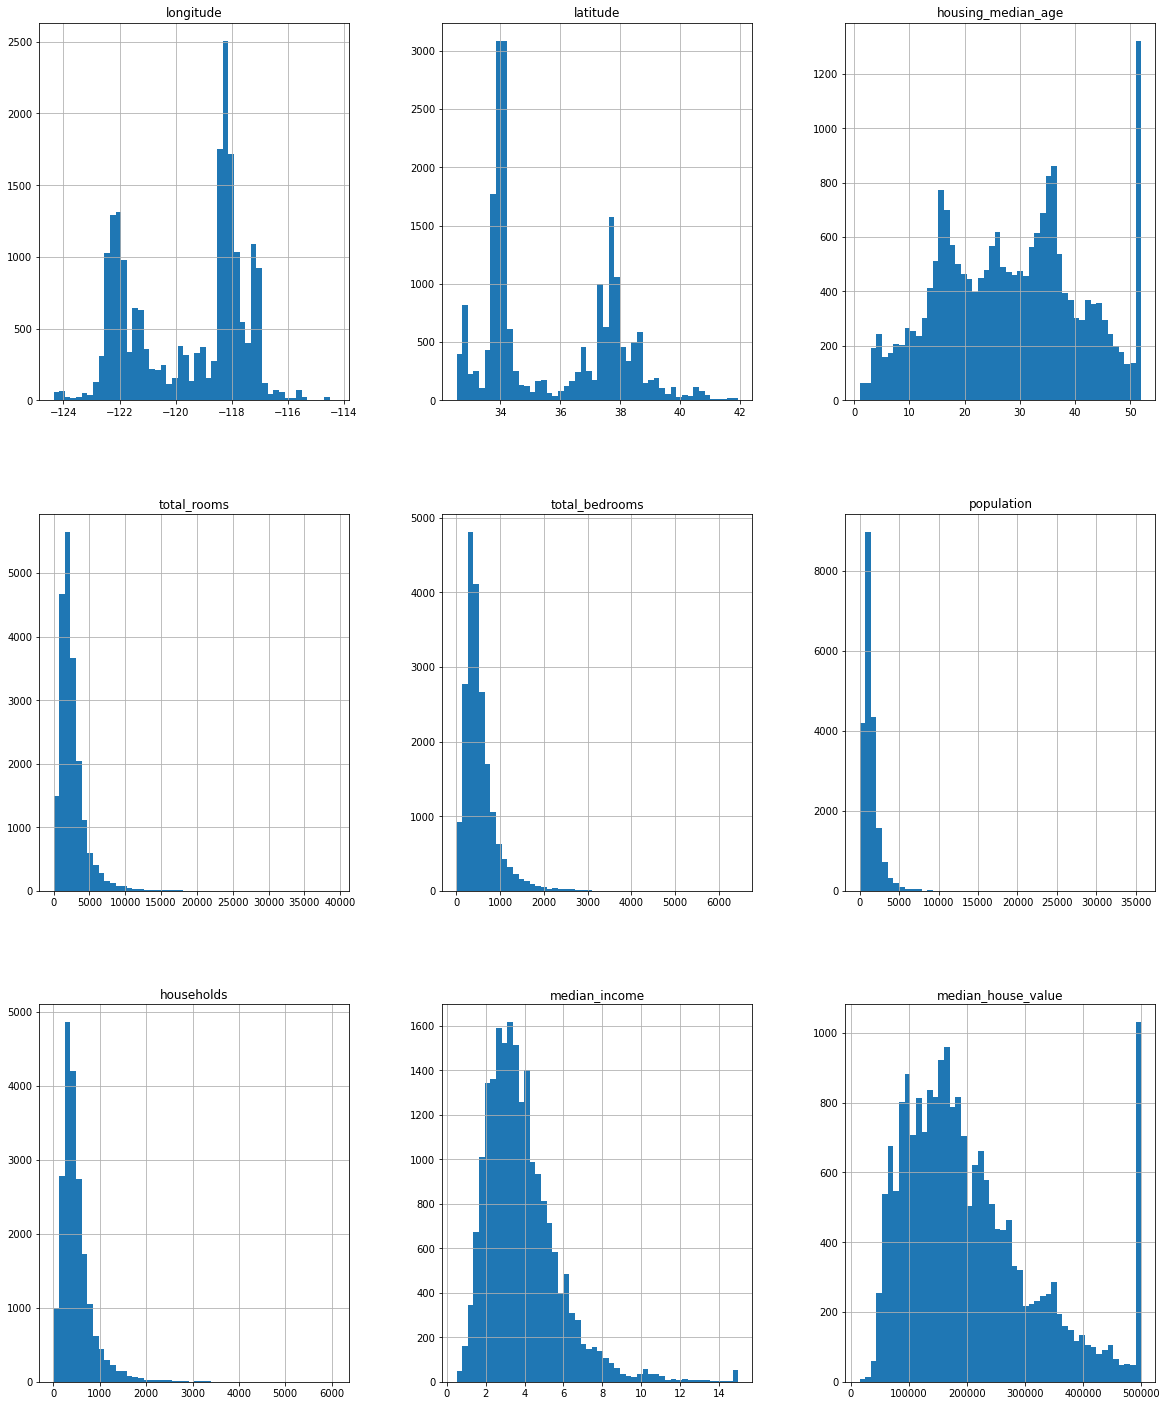

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,25))
plt.show()

## 테스트 세트 만들기

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.25, random_state=42)

In [22]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8158,-118.12,33.81,37.0,1798.0,331.0,860.0,340.0,4.2143,228500.0,<1H OCEAN
18368,-121.98,37.16,42.0,2533.0,433.0,957.0,398.0,5.3468,279900.0,<1H OCEAN
19197,-122.69,38.45,36.0,1943.0,337.0,711.0,318.0,3.9191,183000.0,<1H OCEAN
3746,-118.41,34.16,32.0,3060.0,505.0,1159.0,510.0,6.3703,465800.0,<1H OCEAN
13073,-121.33,38.57,17.0,1621.0,350.0,706.0,338.0,2.3684,150000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


## 데이터 이해를 위한 탐색과 시각화

In [23]:
housing = train_set.copy()

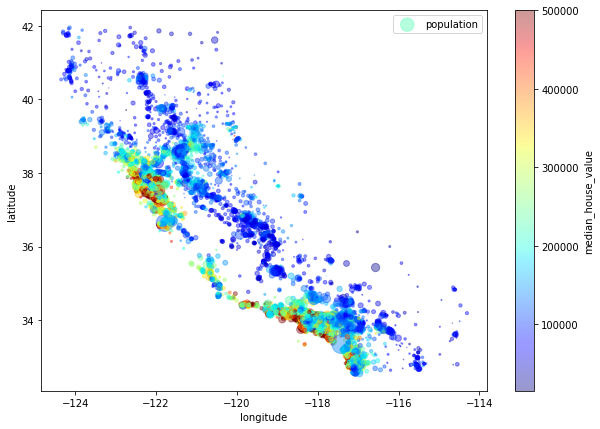

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
# alpha는 포인트가 밀집된 영역을 잘 보여줌

## 상관관계 조사

In [38]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924057,-0.103825,0.036997,0.061303,0.092118,0.047509,-0.016418,-0.047271
latitude,-0.924057,1.000000,0.007177,-0.027330,-0.057967,-0.100419,-0.061960,-0.077450,-0.142351
housing_median_age,-0.103825,0.007177,1.000000,-0.361125,-0.320775,-0.291613,-0.302698,-0.120281,0.103291
total_rooms,0.036997,-0.027330,-0.361125,1.000000,0.930673,0.857934,0.920322,0.196231,0.133474
total_bedrooms,0.061303,-0.057967,-0.320775,0.930673,1.000000,0.879122,0.980270,-0.010142,0.048612
population,0.092118,-0.100419,-0.291613,0.857934,0.879122,1.000000,0.907422,0.002841,-0.025960
households,0.047509,-0.061960,-0.302698,0.920322,0.980270,0.907422,1.000000,0.011211,0.063463
median_income,-0.016418,-0.077450,-0.120281,0.196231,-0.010142,0.002841,0.011211,1.000000,0.688697
median_house_value,-0.047271,-0.142351,0.103291,0.133474,0.048612,-0.025960,0.063463,0.688697,1.000000


In [39]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688697
total_rooms           0.133474
housing_median_age    0.103291
households            0.063463
total_bedrooms        0.048612
population           -0.025960
longitude            -0.047271
latitude             -0.142351
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

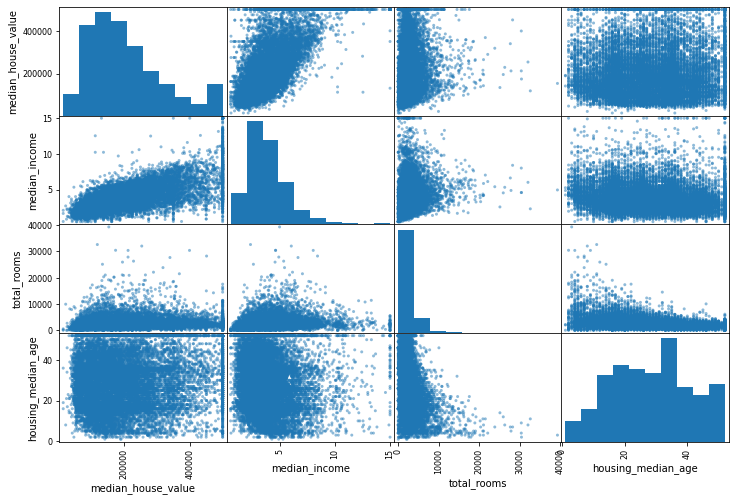

In [41]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

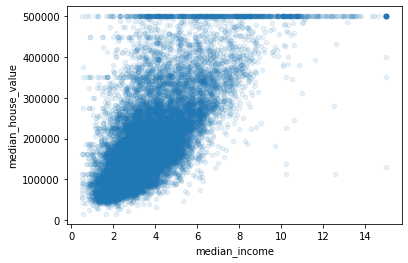

In [42]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
# 상관관계가 매우 강함

## 머신러닝 알고리즘을 위한 데이터 준비

In [43]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

## 데이터 정제

In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [69]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [70]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [71]:
X = imputer.transform(housing_num)

In [72]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(housing.index.values))

In [73]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8158,-118.12,33.81,37.0,1798.0,331.0,860.0,340.0,4.2143
18368,-121.98,37.16,42.0,2533.0,433.0,957.0,398.0,5.3468
19197,-122.69,38.45,36.0,1943.0,337.0,711.0,318.0,3.9191
3746,-118.41,34.16,32.0,3060.0,505.0,1159.0,510.0,6.3703
13073,-121.33,38.57,17.0,1621.0,350.0,706.0,338.0,2.3684
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


## 텍스트와 범주형 특성 다루기

In [55]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

8158      <1H OCEAN
18368     <1H OCEAN
19197     <1H OCEAN
3746      <1H OCEAN
13073        INLAND
11482     <1H OCEAN
15297    NEAR OCEAN
13763        INLAND
8803     NEAR OCEAN
4900      <1H OCEAN
Name: ocean_proximity, dtype: object

In [57]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 0, 0, 1, 0, 2, 1, 2, 0], dtype=int64)

In [58]:
housing_categories

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [61]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [63]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])